In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
%config InlineBackend.figure_format='svg'
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo

In [2]:
data = pd.read_csv("dataced_filter.csv", delimiter=';')

In [3]:
data.head()

,Data,TempMaximaMedia,TempMinimaMedia,UmidadeRelativaMedia,CasosDengue,ChuvasAcumuladas
0,31/03/2005,35.1,23.8,65.2,29,384.3
1,30/04/2005,33.6,23.6,68.1,99,47.5
2,31/05/2005,32.6,23.0,70.1,128,20.7
3,30/06/2005,31.2,22.1,71.1,102,40.1
4,31/07/2005,32.7,20.9,62.1,71,0.0


In [4]:
def converter(old):
   return int(dt.strftime(dt.strptime(old, '%d/%m/%Y'), '%m'))

In [5]:
for i in range(0,55,1):
    data.Data[i] = converter(data.Data[i])

C:\Users\JoseNeto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
data.head()

,Data,TempMaximaMedia,TempMinimaMedia,UmidadeRelativaMedia,CasosDengue,ChuvasAcumuladas
0,3,35.1,23.8,65.2,29,384.3
1,4,33.6,23.6,68.1,99,47.5
2,5,32.6,23.0,70.1,128,20.7
3,6,31.2,22.1,71.1,102,40.1
4,7,32.7,20.9,62.1,71,0.0


In [7]:
X = data.drop('CasosDengue', axis = 1)

In [8]:
Y = data.CasosDengue

In [9]:
regr = LinearRegression()

In [10]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficiente: ", len(regr.coef_))

Coeficiente:  305.703994952
Número de Coeficiente:  5


In [12]:
regr.predict(X)

array([ 26.88129608,  65.51368564,  57.01238477,  43.94407783,
        14.75465038,  69.2484292 ,  60.46355655,  51.59673798,
        46.99184594,  15.79066062,  84.33995626,  50.2085474 ,
        44.64656446,  34.70822047,   8.99236413,  32.36315296,
        56.84188049,  41.18040698,  33.92478636,  21.72070538,
        63.35416241,  -5.48279557,  24.73031092,  30.06259364,
        11.38628702,  46.75428569,  44.91859834,  20.02703155,
        27.40935448,  10.73500368,  81.96029688,  53.14428845,
        45.36309911,  32.02183373,  19.69000446,  64.04902695,
        40.79142567,  36.04058282,  29.99634844,  11.46779628,
        53.7987265 ,  47.77388368,  42.62474113,  24.94909319,
        11.70024347,  15.1292938 ,  56.20517234,  37.7290913 ,
        34.6620193 ,  12.42407184,  58.02463067,  54.00227016,
        31.92177252,  29.82981039,  14.68173485])

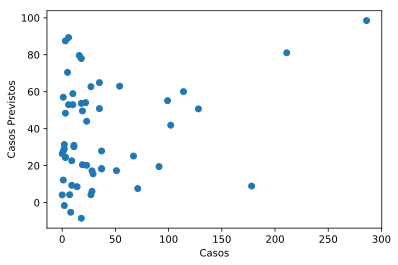

In [32]:
# Comparando casos originais x casos previstos
plt.scatter(data.CasosDengue, regr.predict(X))
plt.xlabel("Casos")
plt.ylabel("Casos Previstos")
plt.show()

In [14]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((data.CasosDengue - regr.predict(X)) ** 2)
print(mse1)

2669.0832950800773


In [15]:
# Aplicando regressõa linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['ChuvasAcumuladas']], data.CasosDengue)
mse2 = np.mean((data.CasosDengue - regr.predict(X[['ChuvasAcumuladas']])) ** 2)
print(mse2)

3046.3792991616797


In [16]:
### O MSE aumentou, indicando que uma única característica não é um bom predictor para os Casos

# Dividindo o dataset

In [17]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = data.CasosDengue[:-50]
Y_teste = data.CasosDengue[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(5, 5) (50, 5) (5,) (50,)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, data.CasosDengue, test_size = 0.33, random_state = 5)

In [20]:
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(36, 5) (19, 5) (36,) (19,)


In [21]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [22]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

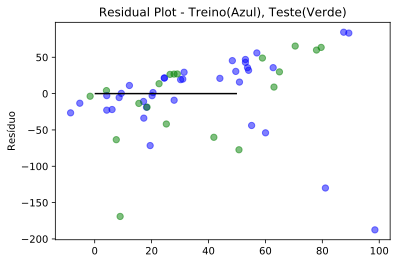

In [24]:
# Comparando casos originais x casos previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

In [25]:
regr.predict(X)

array([ 15.50862049,  55.14708548,  50.70352822,  41.87839395,
         7.58226198,  79.58695285,  77.95106872,  62.71898699,
        53.70191351,   8.58744847,  89.31173583,  54.07722588,
        49.58091772,  30.95167586,   4.23359898,  60.03352786,
        81.07765093,  63.00611638,  30.19476374,  29.03725684,
        87.50548052,  27.8791055 ,  24.53026745,  26.46331977,
         4.13254843,  52.97249735,  58.94245257,  20.48894538,
        27.91400012,   6.10617734,  98.47415699,  64.92169764,
        70.46056022,  48.37176607,  24.42242398,  43.99128432,
        19.48773756,  17.25721791,  20.17214544,  -8.47345209,
        18.39574836,  25.17357807,  18.20667357,   9.35090759,
        -5.23732359,  12.1943293 ,  56.98960874,  31.40845543,
        22.61444501,   4.23781629,  52.97512133,  50.87610362,
         8.93790034,  17.16112814,  -1.6102676 ])

In [26]:
r2_train = regr.score(X_treino, Y_treino)
r2_test = regr.score(X_teste, Y_teste)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.21
R2 no set de teste: -0.40


In [27]:
r2 = regr.score(X, Y)
print('R2 no set de treino: %.2f' % r2)

R2 no set de treino: 0.05


In [28]:
#Finalmente, com o modelo treinado, podemos realizar previsões e ver quão próximas elas estão da realidade. Para isso, vamos utilizar a métrica R2, que nos diz o quanto da variação nos preços (y) é explicada pelo nosso modelo. Vamos computar o R2 para os dados de treino e de teste.

In [29]:
#Nada mal! Nosso modelo explica 73% da variação nos preços dos imóveis! Além disso, podemos ver que seu desempenho é um pouco melhor no set de treino do que no de teste. Isso indica que ele está sofrendo um pouco com sobre-ajustamento. Esses dados contém apenas 506 observações, o que explica parte desse sobre-ajustamento. Para resolver esse problema, poderíamos coletar mais observações, retirar algumas variáveis pouco relevantes ou utilizar alguma técnica mais avançada de regularização (algo que ainda não vimos nos tutoriais passados). 